In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("nasdaq100.csv", sep=';')
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [10]:
df = df.drop(columns = ['Date'])
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


In [11]:
df.isnull().sum()

Starting (USD)    0
Ending (USD)      0
dtype: int64

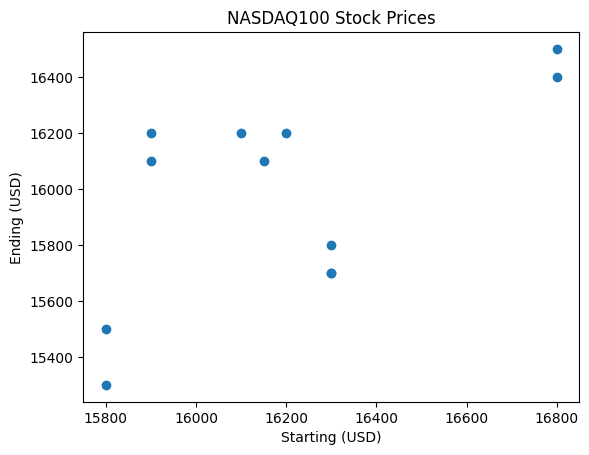

In [13]:
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')
plt.show()

### ***Linear Regression***
**লিনিয়ার মানে সরলরেখা টাইপের। রিগ্রেশন মানে Real-value আউটপুট প্রেডিক্ট করতে হবে।**        
**তাহলে লিনিয়ার রিগ্রেশন হল লাইনের মত মডেল দিয়ে Real Value প্রেডিক্ট করার পদ্ধতি।**

**লিনিয়ার রিগ্রেশন এ আমরা এমন একটা সোজা রেখা খুঁজি যেটা আমাদের ডেটাগুলোর মাঝে দিয়ে সবচেয়ে ভালোভাবে যায়। এই রেখাকেই বলে Best Fit Line.**
![Screenshot 2025-08-04 232804.png](<attachment:Screenshot 2025-08-04 232804.png>)
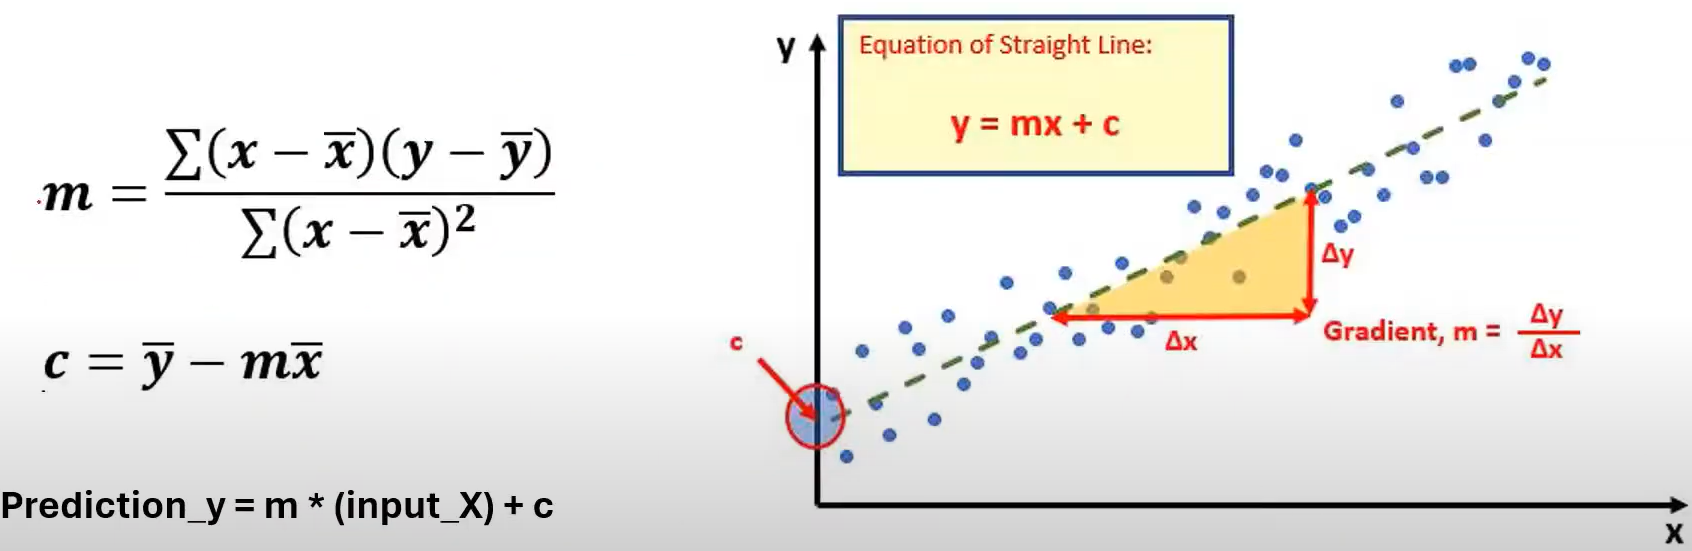  
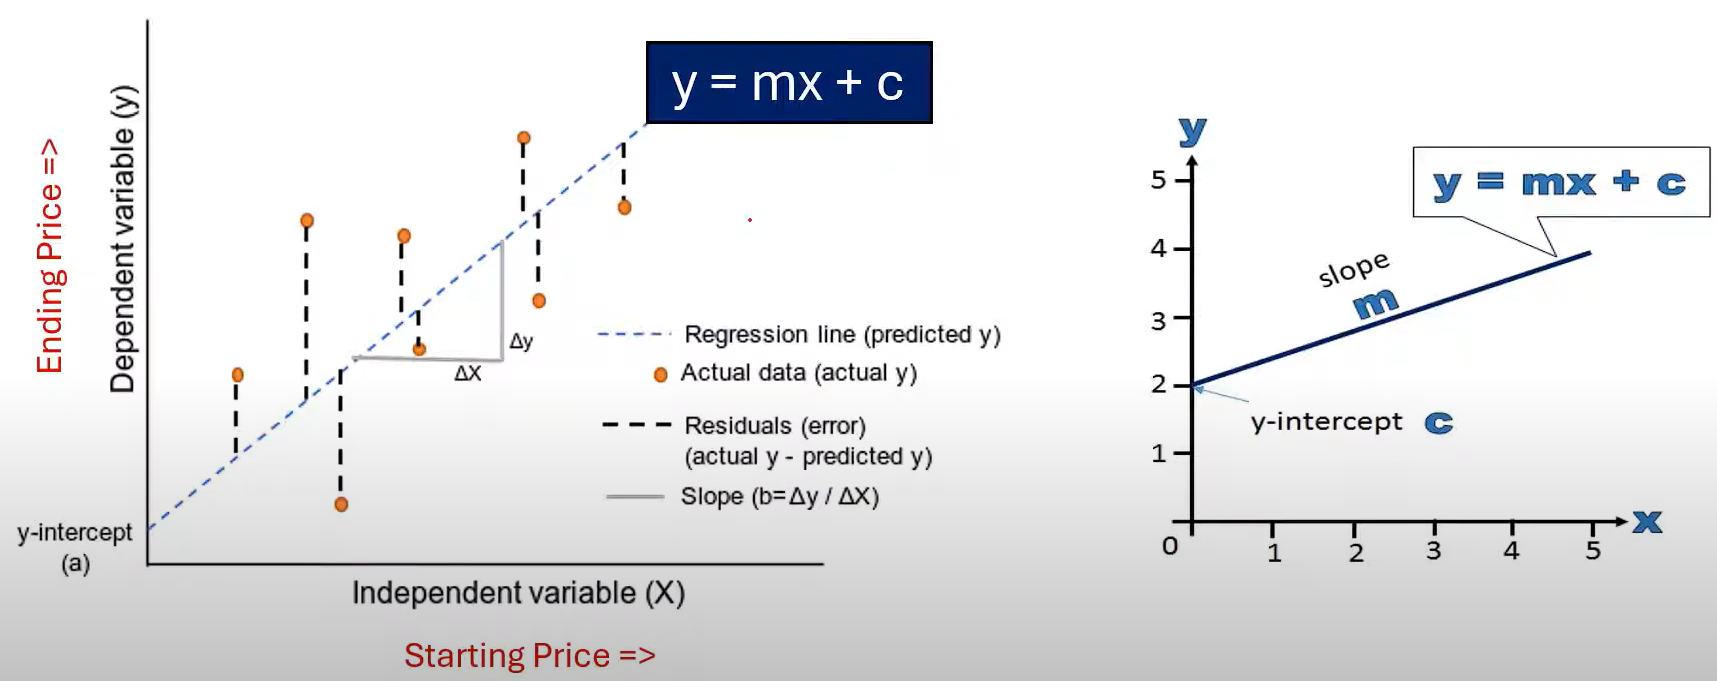

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [17]:
x = df[['Starting (USD)']]
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [18]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [20]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [21]:
y.mean()

Ending (USD)    15975.0
dtype: float64

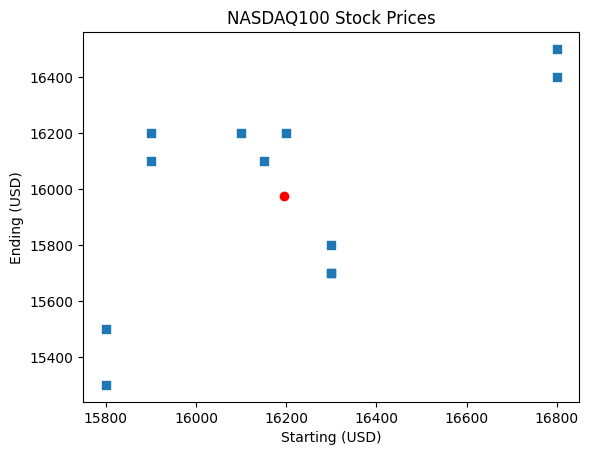

In [25]:
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'], marker='s')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')
plt.show()

### ***Train the linear regression model***

In [27]:
reg.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


***Coefficient/Slope (m)***

In [28]:
m = reg.coef_
m

array([[0.65258293]])

***Intercept (c)***

In [29]:
c = reg.intercept_
c

array([5405.87555702])

***If Strating Prices is 16700 USD, predict the Endind USD using this model.***

In [30]:
m * 16700 + c

array([[16304.0105628]])

In [31]:
reg.predict([[16700]])

C:\Users\Rafiqul Islam\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

***Now, I will create a Predicted_y column based on each x (Strating (USD)).***

In [32]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


***Plotting the all concepts.***     
***Green line represent the best fit line.***

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

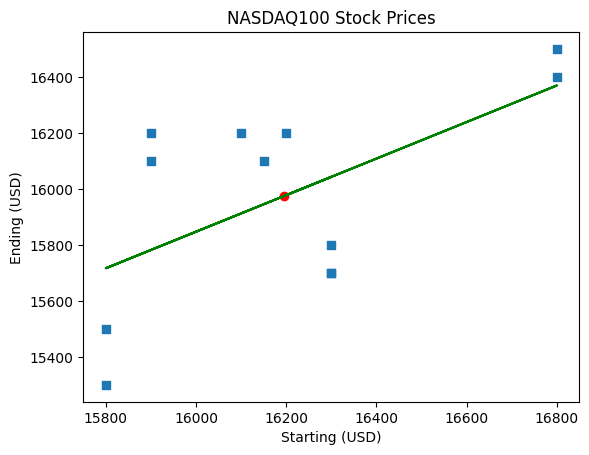

In [34]:
plt.plot(x, reg.predict(x),color='green')
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'], marker='s')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

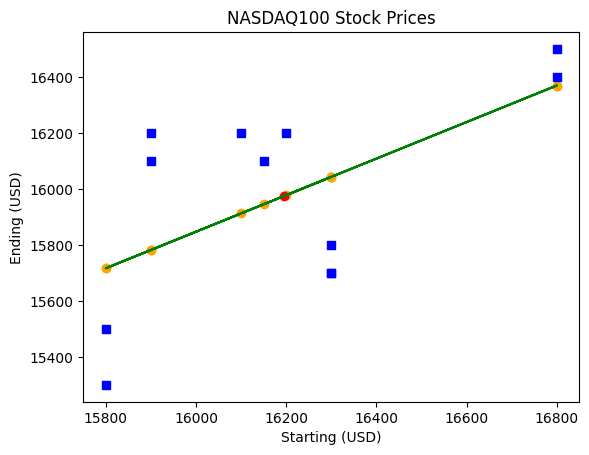

In [55]:
plt.scatter(df['Starting (USD)'] , reg.predict(x),color='orange')
plt.plot(x, reg.predict(x),color='green')
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'], marker='s', color='blue')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

## ***Loss & Cost Functions***         
**আমাদের মডেল টেস্ট ডেটার ফিচার ভ্যারিয়েবলকে ইনপুট হিসাবে নিয়ে যা প্রিডিক্ট করবে সেই ফলাফলের সাথে টেস্ট ডেটার অরিজিনাল ভ্যালুর যে পার্থক্য সেটাই এরর। Linear Regression-এ Loss Function ও Cost Function ব্যবহার করে মডেলটি কতটা ভুল করছে তা মাপা হয়।**                        
**এখানে সবচেয়ে জনপ্রিয় ফাংশন:**  

***Mean Absolute Error (MAE) - এররের Absolute মানের গড়***        
***Mean Squared Error (MSE) - এররের বর্গের গড় মান (বেশি ব্যবহৃত)***        
***Root Mean Squared Error (RMSE) - MSE এর বর্গমূল***          
***R Squared Error- 1-RSE***  
                   
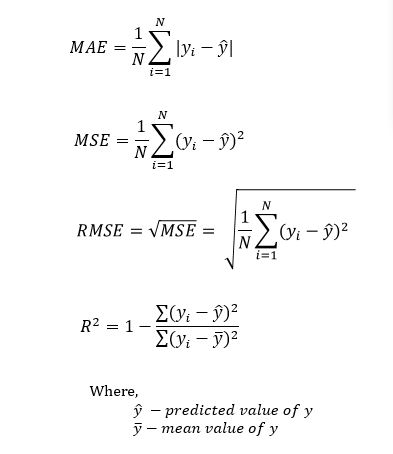                 

***Adding loss coloum***       
***loss =  y - predicted_y***

In [42]:
df['loss'] = df['Ending (USD)'] - df['Predicted_y']
df.head()

,Starting (USD),Ending (USD),Predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [44]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [45]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [46]:
rmse = root_mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
rmse

283.5687464742965

In [49]:
#Calculate MAE manualy
sum(abs(df['loss'])) / len(x)

260.3840017604666

### ***Coefficient of Determination / R2 Squared Value / Accuracy for Regression***          
**"আমার মডেলটা আসলে কতটা ভালো কাজ করছে?"**   
 
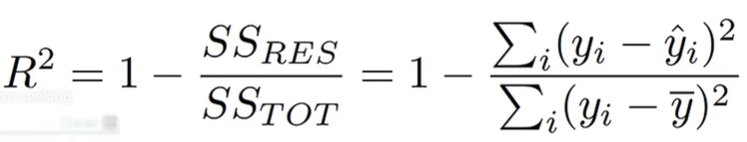               
***SSres = Residual Sum of Squares Errors***         
***SStot = Total Sum of Squares Errors***

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y, reg.predict(x))

0.3577804940272571

In [58]:
#Using score() function
reg.score(x,y)

0.3577804940272571